In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN


In [4]:
gdp_df.shape

(7176, 4)

How many rows and columns are in `gdp_df`? 7176 rows & 4 columns

In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
gdp_df=gdp_df.drop(columns = ['Value Footnotes'])

In [8]:
gdp_df.columns=['Country','Year','GDP_Per_Capita']

In [8]:
gdp_df.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [8]:
gdp_df_years_recorded=gdp_df.Country.value_counts()

In [9]:
gdp_df_years_recorded=gdp_df_years_recorded.to_frame()

In [10]:
len(gdp_df_years_recorded[(gdp_df_years_recorded['Country']==31)])

205

205 Countries have data for all years

In [11]:
len(gdp_df_years_recorded[(gdp_df_years_recorded['Country']!=31)])

37

37 countries have missing years of data

In [12]:
gdp_df_obv_per_yr=gdp_df.Year.value_counts()

In [13]:
gdp_df_obv_per_yr=gdp_df_obv_per_yr.to_frame()

In [14]:
gdp_df_obv_per_yr=gdp_df_obv_per_yr.reset_index(drop=False)

In [15]:
gdp_df_obv_per_yr.head()

,index,Year
0,2018,242
1,2017,242
2,2016,242
3,2015,242
4,2014,242


In [16]:
gdp_df_obv_per_yr.columns=['Year','Observations']
gdp_df_obv_per_yr.head()

,Year,Observations
0,2018,242
1,2017,242
2,2016,242
3,2015,242
4,2014,242


,Year,Observations


<AxesSubplot:xlabel='Country', ylabel='GDP_Per_Capita'>

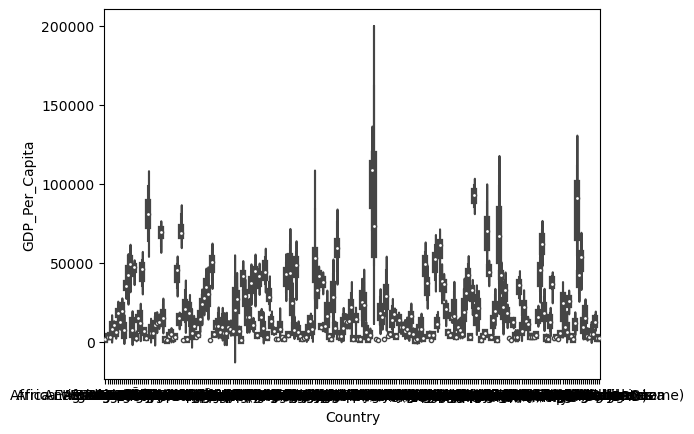

In [58]:
sns.violinplot(x=gdp_df['Country'], y=gdp_df['GDP_Per_Capita'])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

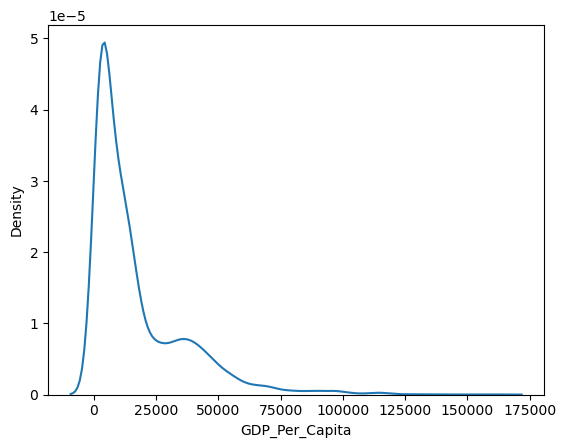

In [59]:
sns.kdeplot(gdp_df['GDP_Per_Capita'])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

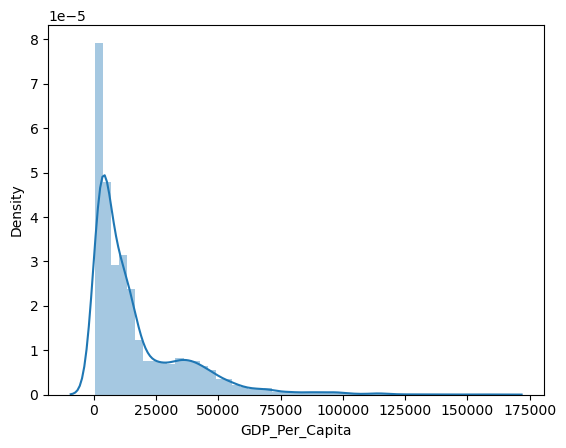

In [63]:
sns.distplot( a=gdp_df["GDP_Per_Capita"], hist=True, kde=True, rug=False )

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Year'>

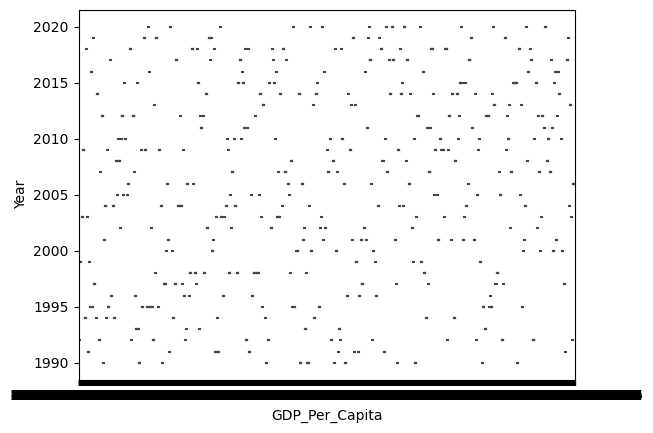

In [65]:
sns.boxplot( x=gdp_df["GDP_Per_Capita"], y=gdp_df["Year"] )

In [9]:
gdp_df.loc[gdp_df['Year'] == 2020, 'GDP_Per_Capita'].median()

12908.9374056206

In [10]:
decades_gdp=gdp_df

In [11]:
decades_gdp['Year']=decades_gdp['Year']//10*10

In [12]:
print(decades_gdp)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2010     2065.036235
2     Afghanistan  2010     2033.804389
3     Afghanistan  2010     2058.400221
4     Afghanistan  2010     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1990     2603.927369
7172     Zimbabwe  1990     2420.092791
7173     Zimbabwe  1990     2437.152908
7174     Zimbabwe  1990     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


In [13]:
decades_gdp=decades_gdp.groupby(['Year'], as_index=False)['GDP_Per_Capita'].median()

In [13]:
decades_gdp=decades_gdp.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [14]:
decades_gdp.columns=['Year', 'GDP_Per_Capita']

In [16]:
print(decades_gdp)

   Year  GDP_Per_Capita
0  1990     6687.421607
1  2000     9492.558056
2  2010    12672.888318
3  2020    12908.937406


<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

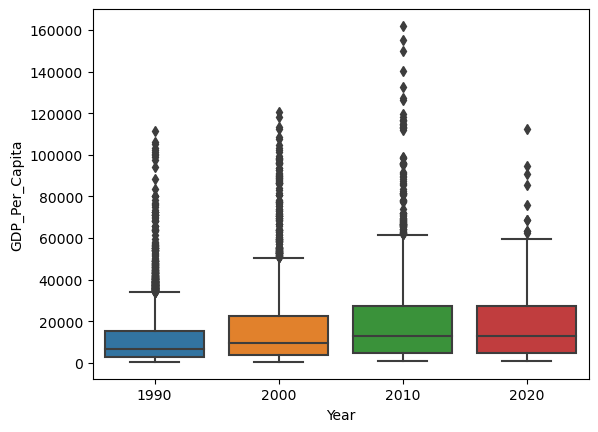

In [15]:
sns.boxplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'])

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

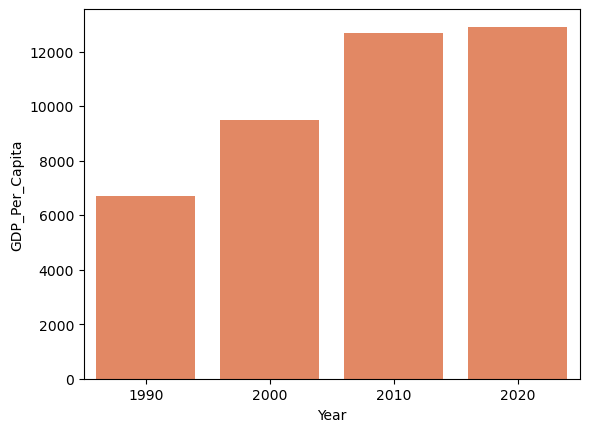

In [18]:
sns.barplot(
    y='GDP_Per_Capita',
    x='Year',
    data=decades_gdp,
    estimator=sum,
    ci=None,
    color='#f77f4f')

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

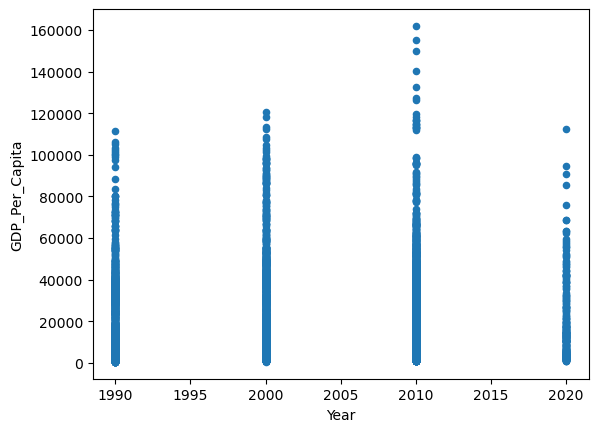

In [19]:
gdp_df.plot.scatter(x='Year', y='GDP_Per_Capita')

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

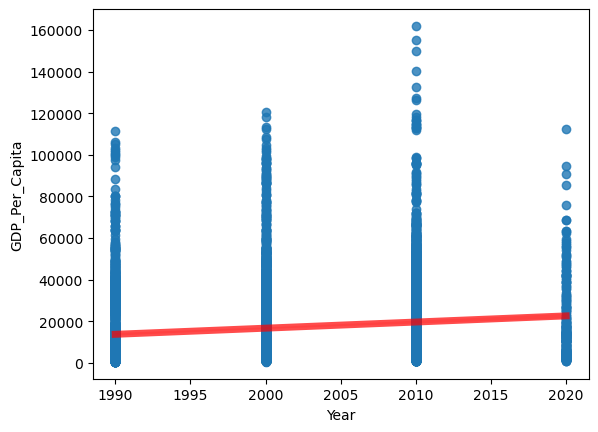

In [20]:
sns.regplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})

In [21]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2010     2065.036235
2     Afghanistan  2010     2033.804389
3     Afghanistan  2010     2058.400221
4     Afghanistan  2010     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1990     2603.927369
7172     Zimbabwe  1990     2420.092791
7173     Zimbabwe  1990     2437.152908
7174     Zimbabwe  1990     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


In [16]:
first_country=gdp_df.query('GDP_Per_Capita > 100000').sort_values(by = 'Year', ascending=True)

In [17]:
first_country.head(1)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


UAE has $100k+ GDP per capita in 1990


In [18]:
max_gdp_tw=gdp_df.loc[gdp_df['Year'] == 2020, 'GDP_Per_Capita'].max(axis=0)

In [19]:
gdp_df.loc[gdp_df['GDP_Per_Capita'] == max_gdp_tw, 'Country']

3882    Luxembourg
Name: Country, dtype: object

Highest Per Capita GDP in 2020: Luxembourg

In [20]:
min_gdp_tw=gdp_df.loc[gdp_df['Year'] == 2020, 'GDP_Per_Capita'].min(axis=0)

In [21]:
gdp_df.loc[gdp_df['GDP_Per_Capita']==min_gdp_tw, 'Country']

914    Burundi
Name: Country, dtype: object

Lowest Per Capita GDP in 2020: Burundi

In [22]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [26]:
internet_df=internet_df.drop(columns = ['Value Footnotes'])

In [28]:
internet_df.columns=['Country','Year','Value']

In [47]:
internet_df.shape

(4495, 3)

In [29]:
internet_df.groupby(['Year'], as_index=False)['Country'].count()

,Year,Country
0,1960,7
1,1965,7
2,1970,7
3,1975,7
4,1976,7
5,1977,7
6,1978,7
7,1979,7
8,1980,7
9,1981,7


In [33]:
internet_df.loc[internet_df['Value'] != 0].sort_values(by = 'Year', ascending=True)

,Country,Year,Value
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


Multiple Countries have their first non-zero value in 1990 including Italy, Denmark, and the United States

,Country,Year,Value
14,Afghanistan,1990,0.0
35,Albania,1990,0.0
57,Algeria,1990,0.0
58,American Samoa,1990,0.0
77,Andorra,1990,0.0
...,...,...,...
4408,Viet Nam,1990,0.0
4430,Virgin Islands (U.S.),1990,0.0
4450,Yemen,1990,0.0
4472,Zambia,1990,0.0


In [43]:
internet_df.loc[(internet_df['Value']<5) & (internet_df['Year']==2014)]

,Country,Year,Value
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


In [72]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                               left_on = ['Country', 'Year'], right_on = ['Country', 'Year'], 
                               how = 'outer')

In [73]:
print(gdp_and_internet_use)

           Country  Year  GDP_Per_Capita     Value
0      Afghanistan  2020     1970.560169       NaN
1      Afghanistan  2010     2065.036235  4.000000
2      Afghanistan  2010     2033.804389  4.000000
3      Afghanistan  2010     2058.400221  4.000000
4      Afghanistan  2010     2057.067978  4.000000
...            ...   ...             ...       ...
11192     Zimbabwe  1998             NaN  0.081648
11193     Zimbabwe  1997             NaN  0.033080
11194     Zimbabwe  1996             NaN  0.016790
11195     Zimbabwe  1995             NaN  0.007684
11196     Zimbabwe  1994             NaN  0.001739

[11197 rows x 4 columns]


In [76]:
gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014].sort_values(by = 'Value', ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Value
8850,Iceland,2014,NaN,98.16
7539,Bermuda,2014,NaN,96.80
9873,Norway,2014,NaN,96.30
